## Dimensionality Reduction Algorithms: PCA, LDA, t-SNE, and Autoencoders


### Task 1: Principal Component Analysis (PCA)

**Objective:** Implement PCA from scratch using NumPy and apply it using scikit-learn on a real-world dataset. Visualize the dataset in reduced dimensions and analyze how much variance is explained by each principal component.


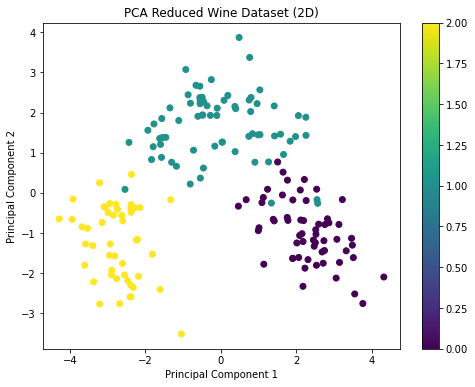

Explained Variance Ratios: [0.36198848 0.1920749 ]


In [1]:

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load dataset
data = load_wine()
X = data.data
y = data.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA from scratch
def pca_scratch(X, n_components=2):
    # Compute covariance matrix
    covariance_matrix = np.cov(X.T)
    
    # Get eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    
    # Sort eigenvectors by eigenvalues
    idx = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, idx]
    
    # Reduce dimensionality
    X_reduced = np.dot(X, eigenvectors[:, :n_components])
    return X_reduced

# Reduce data to 2 dimensions
X_reduced_scratch = pca_scratch(X_scaled)

# Using scikit-learn PCA for comparison
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

# Plotting the reduced data
plt.figure(figsize=(8,6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')
plt.title("PCA Reduced Wine Dataset (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratios: {explained_variance}")



### Task 2: Linear Discriminant Analysis (LDA)

**Objective:** Apply LDA on a multi-class classification dataset to reduce dimensionality while retaining class separability.


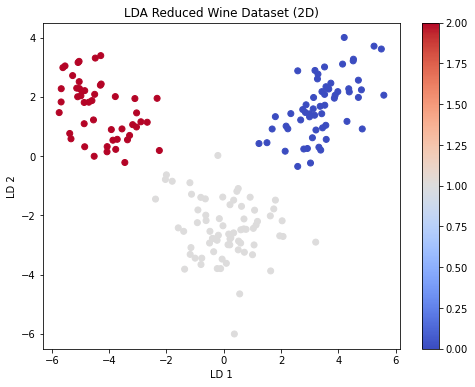

Accuracy on LDA reduced dataset: 1.0


In [2]:

# Import necessary libraries
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Perform LDA
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

# Plot LDA results
plt.figure(figsize=(8,6))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='coolwarm')
plt.title("LDA Reduced Wine Dataset (2D)")
plt.xlabel("LD 1")
plt.ylabel("LD 2")
plt.colorbar()
plt.show()

# Train a classifier on LDA-reduced data
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.3, random_state=42)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on LDA reduced dataset: {accuracy}")



### Task 3: t-SNE (t-Distributed Stochastic Neighbor Embedding)

**Objective:** Use t-SNE for visualizing high-dimensional data in 2D or 3D space, capturing non-linear relationships.


c:\Users\91771\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\91771\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


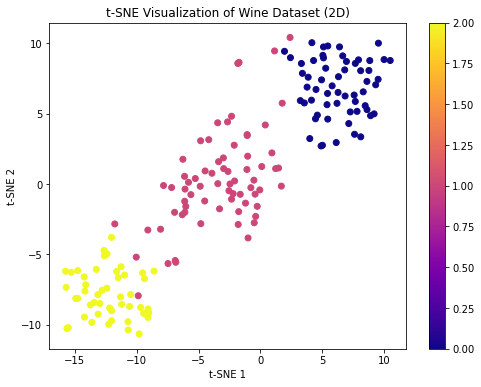

In [3]:

# Import necessary libraries
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plotting the t-SNE result
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='plasma')
plt.title("t-SNE Visualization of Wine Dataset (2D)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.colorbar()
plt.show()



### Task 4: Autoencoders (Neural Networks for Dimensionality Reduction)

**Objective:** Use autoencoders, a type of neural network, for reducing dimensionality and compare performance with PCA.


In [4]:

# Import necessary libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the autoencoder
input_dim = X_scaled.shape[1]
encoding_dim = 2

autoencoder = Sequential([
    Dense(64, activation='relu', input_shape=(input_dim,)),
    Dense(32, activation='relu'),
    Dense(encoding_dim, activation='relu'),  # Bottleneck layer
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(input_dim, activation='sigmoid')
])

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=32, shuffle=True)

# Extract the encoder part for dimensionality reduction
encoder = Sequential(autoencoder.layers[:3])
X_encoded = encoder.predict(X_scaled)

# Plot encoded (2D) data
plt.figure(figsize=(8,6))
plt.scatter(X_encoded[:, 0], X_encoded[:, 1], c=y, cmap='coolwarm')
plt.title("Autoencoder Reduced Wine Dataset (2D)")
plt.xlabel("Encoded Dimension 1")
plt.ylabel("Encoded Dimension 2")
plt.colorbar()
plt.show()


ModuleNotFoundError: No module named 'tensorflow'